In [4]:
import pandas as pd 
import glob 
from matplotlib import pyplot as plt
from matplotlib import colors
import matplotlib.patches as mpatches
import matplotlib as mpl
import numpy as np
from matplotlib.gridspec import GridSpec

In [5]:
approved_tab = pd.read_table('Data/NLR_rmsd_lddt_tab.tsv',sep='\t')
non_motif_tab = pd.read_table('Data/non_motif_rmsd_lddt_tab.tsv',sep='\t')
motif_tab = pd.read_table('Data/motif_rmsd_lddt_tab.tsv',sep='\t')

In [6]:
approved_sum_tab = approved_tab.query("0 <= rms <= 10")
motif_sum_tab = motif_tab.query("0<= rms <=10")
non_motif_sum_tab = non_motif_tab.query("0<= rms <=10")

In [7]:
lole = str(len(approved_sum_tab.query('rms <= 2.5').query('lddt < 0.7')))
uple = str(len(approved_sum_tab.query('rms <= 2.5').query('lddt >= 0.7')))
lori = str(len(approved_sum_tab.query('rms > 2.5').query('lddt < 0.7')))
upri = str(len(approved_sum_tab.query('rms > 2.5').query('lddt >= 0.7')))

Text(0.5, -0.05, 'RMSD [Å]')

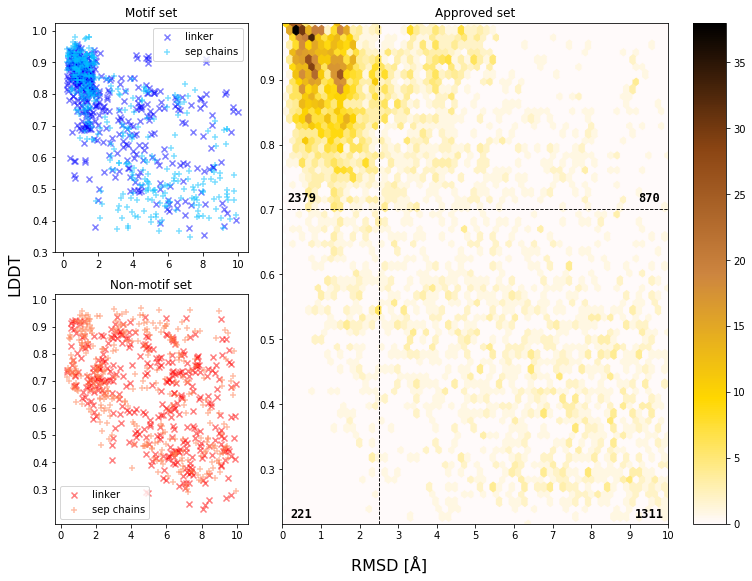

In [9]:
fig = plt.figure(constrained_layout=True, figsize=(10,7.5))
gs1 = fig.add_gridspec(nrows=4, ncols=6)
ax1 = fig.add_subplot(gs1[0:4, 2:6])
ax2 = fig.add_subplot(gs1[0:2, 0:2])
ax3 = fig.add_subplot(gs1[2:4, 0:2])

hexcmap = colors.LinearSegmentedColormap.from_list('', 
                                                ['snow', 'gold',  'peru','saddlebrown', 'black'])


cm = mpl.cm.ScalarMappable(norm=None, cmap=hexcmap)

ax2.scatter(motif_sum_tab.query('run_type == "linker"')['rms'],motif_sum_tab.query('run_type == "linker"')['lddt'], marker="x",alpha=0.5, c="b", label="linker")
ax2.scatter(motif_sum_tab.query('run_type == "sep"')['rms'],motif_sum_tab.query('run_type == "sep"')['lddt'], marker="+",alpha=0.5, c="deepskyblue", label="sep chains")
ax2.set_xticks(np.arange(0,11,2))
ax2.set_yticks(np.arange(0.3,1.1,0.1))

ax3.scatter(non_motif_sum_tab.query('run_type == "linker"')['rms'],non_motif_sum_tab.query('run_type == "linker"')['lddt'], marker="x",alpha=0.5, c="r", label="linker")
ax3.scatter(non_motif_sum_tab.query('run_type == "sep"')['rms'],non_motif_sum_tab.query('run_type == "sep"')['lddt'], marker="+",alpha=0.5, c="coral", label="sep chains")
ax3.set_xticks(np.arange(0,11,2))
ax3.set_yticks(np.arange(0.3,1.1,0.1))

filt_tab = approved_sum_tab#.query('run_type == "linker"')

hb = ax1.hexbin(filt_tab['rms'],filt_tab['lddt'],gridsize=60, cmap=hexcmap)
ax1.vlines(x=2.5, ymin=filt_tab['lddt'].min(), ymax=filt_tab['lddt'].max(), linestyle='--', lw=0.9)
ax1.hlines(y=0.7, xmin=filt_tab['rms'].min(), xmax=filt_tab['rms'].max(), linestyle='--', lw=0.9)
ax1.set_xticks(np.arange(0,11,1))

ax1.set_title('Approved set')
ax2.set_title('Motif set')
ax3.set_title('Non-motif set')

x_loc = 0.05
y_loc = 0.02
font_size = "large"

ax1.text(x_loc, y_loc,lole, ha='center', va='center', transform=ax1.transAxes, fontweight = 'extra bold', fontsize=font_size, fontfamily="monospace")
ax1.text(1-x_loc, 1-y_loc*17.5,upri, ha='center', va='center', transform=ax1.transAxes, fontweight = 'extra bold', fontsize=font_size, fontfamily="monospace")
ax1.text(x_loc, 1-y_loc*17.5,uple, ha='center', va='center', transform=ax1.transAxes, fontweight = 'extra bold', fontsize=font_size, fontfamily="monospace")
ax1.text(1-x_loc, y_loc,lori, ha='center', va='center', transform=ax1.transAxes, fontweight = 'extra bold', fontsize=font_size, fontfamily="monospace")


cm.set_array(hb.get_array())

ax3.legend()
ax2.legend()
fig.colorbar(cm, ax=ax1)

fig.text(-0.03, .5, "LDDT", rotation = 'vertical', size = 16, va="center")
fig.text(.5, -0.05, "RMSD [Å]", rotation = 'horizontal', size = 16, ha="center")
